In [ ]:
!pip install pandas matplotlib numpy


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 8.1/8.1 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 2.3/2.3 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 7.0/7.0 MB 11.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\shahd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


           Left_time  Right_time  Left_prop  Right_prop
session 1   328062.0    438201.0   0.428132    0.571868
session 2   312882.0    503640.0   0.383189    0.616811
session 3   300370.0    443856.0   0.403601    0.596399
session 4   350017.0    588219.0   0.373059    0.626941
session 5   207109.0    298344.0   0.409749    0.590251
session 6  1044719.0    313499.0   0.769184    0.230816
session 7   674567.0    190979.0   0.779354    0.220646
session 8   888971.0    539990.0   0.622110    0.377890


AttributeError: module 'matplotlib' has no attribute 'ylabel'

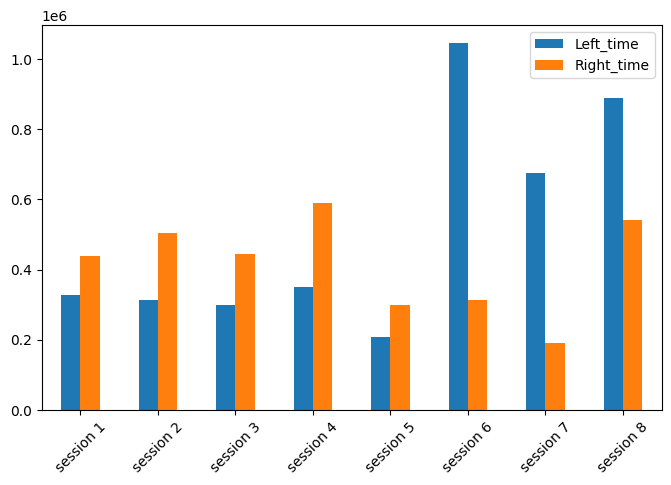

In [5]:
import pandas as pd
import os
import matplotlib as plt

def calculate_left_right_time(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        # Ensure numeric types
        df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
        df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')
        df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


        # Calculate left and right times
        left_time = df['rewA'].sum() + df['rewB'].sum()
        right_time = df['rewC'].sum() + df['rewD'].sum()
        
        # ✅ Now calculate proportions inside the loop
        total_time = left_time + right_time
        left_prop = left_time / total_time if total_time > 0 else 0
        right_prop = right_time / total_time if total_time > 0 else 0

        results[path] = {
            'Left_time': left_time,
            'Right_time': right_time,
            'Left_prop': left_prop,
            'Right_prop': right_prop
        }

    return pd.DataFrame(results).T






def plot_left_right(summary_df):
    # Plot absolute times
    summary_df[['Left_time', 'Right_time']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Total Time (s)")
    plt.title("Time spent Left vs Right per Session")
    plt.legend(title="Side")
    plt.tight_layout()
    plt.show()

    # Plot proportions
    summary_df[['Left_prop', 'Right_prop']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Proportion of Time")
    plt.title("Proportion of Time Left vs Right per Session")
    plt.legend(title="Side")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
    r"C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
]

summary = calculate_left_right_time(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
print(summary)

plot_left_right(summary)


                                                    Left_time  Right_time  \
C:\Users\shahd\Box\Awake Project\Maze data\simp...   328062.0    438201.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   312882.0    503640.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   300370.0    443856.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   350017.0    588219.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   207109.0    298344.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  1044719.0    313499.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   674567.0    190979.0   
C:\Users\shahd\Box\Awake Project\Maze data\simp...   888971.0    539990.0   

                                                    Left_prop  Right_prop  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.428132    0.571868  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.383189    0.616811  
C:\Users\shahd\Box\Awake Project\Maze data\simp...   0.403601    0.596399  
C:

AttributeError: module 'matplotlib' has no attribute 'ylabel'

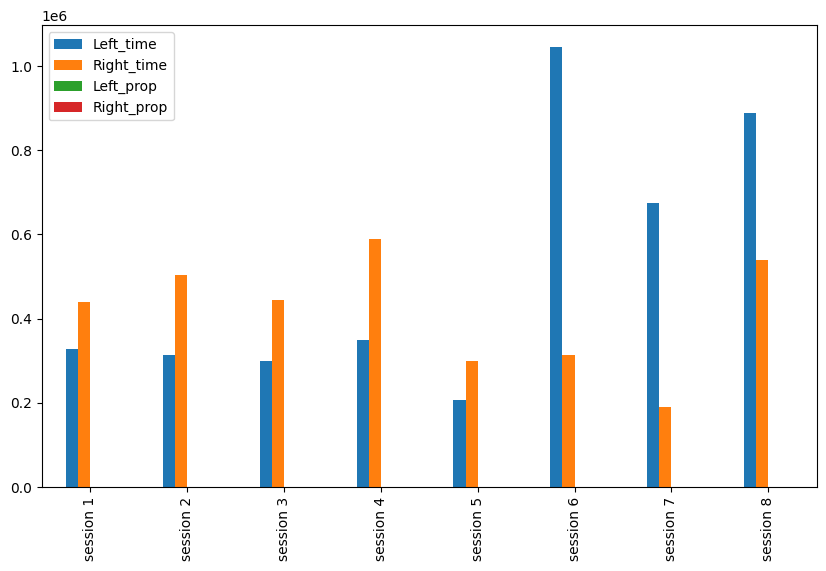

In [6]:
#how much time the mouse spends on the right (rewC and rewD) vs the left (rewA and B)

import pandas as pd
import os

def calculate_filtered_left_right_time(filepaths):
    results = {}

    for path in filepaths:
        try:
            df = pd.read_csv(path)

            # Convert timestamps to numeric
            df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
            df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')

            # Drop rows with missing timestamps
            df = df.dropna(subset=['trial_start_time', 'end_trial_time'])

            # Calculate trial duration
            df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


            # Filter out invalid durations
            df = df[df['trial_duration'] > 0]

            # Remove outliers using IQR
            Q1 = df['trial_duration'].quantile(0.25)
            Q3 = df['trial_duration'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df['trial_duration'] >= lower_bound) & (df['trial_duration'] <= upper_bound)]

            # Convert to numeric and drop NaNs
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                df[col] = pd.to_numeric(df[col], errors='coerce')

            # Drop rows with any NaNs in reward columns
            df = df.dropna(subset=['rewA', 'rewB', 'rewC', 'rewD'])

            # Remove extreme outliers using IQR
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


            # Remove rows with extreme values in any reward column
            for col in ['rewA', 'rewB', 'rewC', 'rewD']:
                df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]



            # Sum durations for left and right zones
            left_time = df['rewA'].sum() + df['rewB'].sum()
            right_time = df['rewC'].sum() + df['rewD'].sum()


            results[os.path.basename(path)] = {'Left_time': left_time, 'Right_time': right_time}

        except Exception as e:
            print(f"⚠️ Error processing {path}: {e}")

    return pd.DataFrame(results).T



# Example usage with your two CSVs
filepaths = [
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\session 3.1\session_data_2024-08-19_12_36_04.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2\session_data_2024-08-21_11_14_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3\session_data_2024-08-22_14_33_31.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4\session_data_2024-08-23_10_42_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5\session_data_2024-08-27_13_05_19.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6\session_data_2024-08-28_11_58_14.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-29_10_23_026357session3.7\session_data_2024-08-29_10_23_02.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-30_10_07_556357session3.8\session_data_2024-08-30_10_07_55.csv"
]


summary = calculate_left_right_time(filepaths)
print(summary)

summary = calculate_left_right_time(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Time Spent (s)")
plt.title("Time in Left vs. Right Reward Zones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                                                        rewA      rewD  \
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.357143  0.285714   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.166667  0.055556   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.150000  0.100000   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.117647  0.117647   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.148148  0.111111   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.142857  0.023810   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.428571  0.102041   
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.400000  0.022222   

                                                        rewC      rewB  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.285714  0.071429  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.666667  0.111111  
C:\Users\shahd\Box\Awake Project\Maze data\simp...  0.700000  0.050000  
C:\Users\shahd\Box\Awake Project\Maze dat

C:\Users\shahd\AppData\Local\Temp\ipykernel_63508\76346633.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


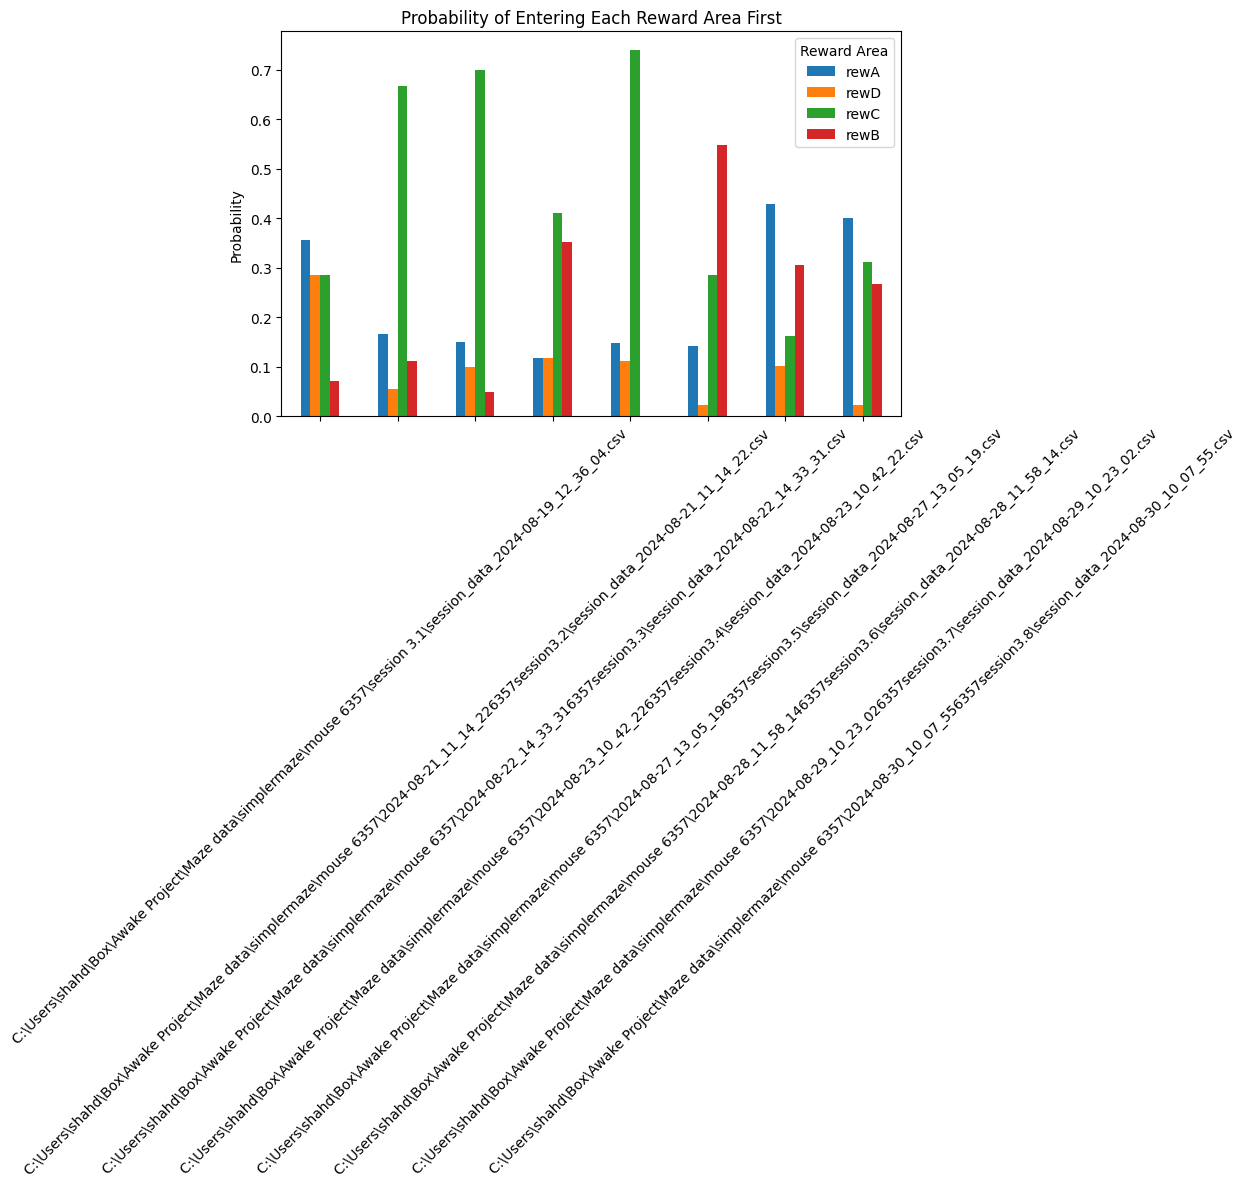

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_entry_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop NaNs from first_reward_area_visited
        valid = df['first_reward_area_visited'].dropna()

        # Count occurrences
        counts = valid.value_counts()

        # Convert to probabilities
        probs = counts / counts.sum()

        # Store results
        results[path] = probs.to_dict()

    return pd.DataFrame(results).T.fillna(0)


def plot_entry_probabilities(prob_df):
    prob_df.plot(kind="bar", figsize=(8, 5), rot=45)
    plt.ylabel("Probability")
    plt.title("Probability of Entering Each Reward Area First")
    plt.legend(title="Reward Area")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\session 3.1\session_data_2024-08-19_12_36_04.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2\session_data_2024-08-21_11_14_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3\session_data_2024-08-22_14_33_31.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4\session_data_2024-08-23_10_42_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5\session_data_2024-08-27_13_05_19.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6\session_data_2024-08-28_11_58_14.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-29_10_23_026357session3.7\session_data_2024-08-29_10_23_02.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-30_10_07_556357session3.8\session_data_2024-08-30_10_07_55.csv"
]

entry_probs = calculate_entry_probabilities(filepaths)
# Relabel index to "session 1", "session 2", ...
summary.index = [f"session {i+1}" for i in range(len(summary))]
print(entry_probs)

plot_entry_probabilities(entry_probs)


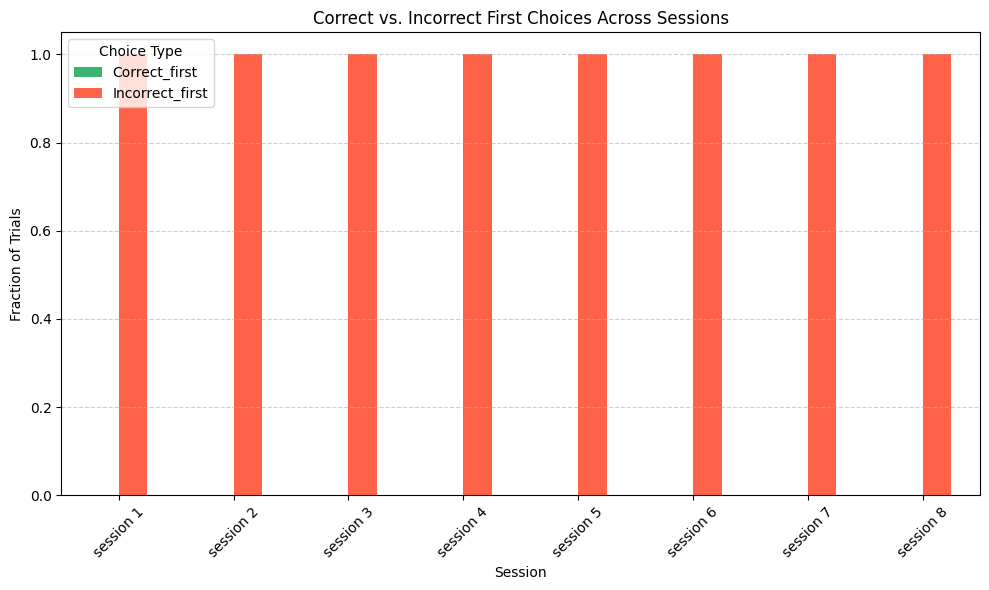

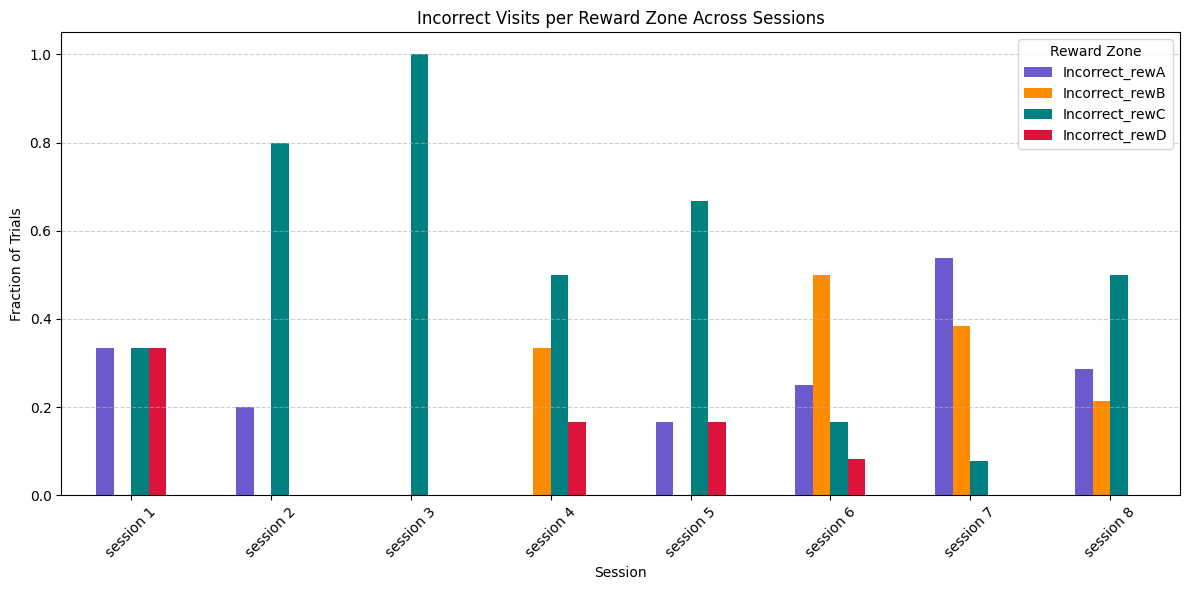

           Correct_first  Incorrect_first  Incorrect_rewA  Incorrect_rewB  \
session 1            0.0              1.0        0.333333        0.000000   
session 2            0.0              1.0        0.200000        0.000000   
session 3            0.0              1.0        0.000000        0.000000   
session 4            0.0              1.0        0.000000        0.333333   
session 5            0.0              1.0        0.166667        0.000000   
session 6            0.0              1.0        0.250000        0.500000   
session 7            0.0              1.0        0.538462        0.384615   
session 8            0.0              1.0        0.285714        0.214286   

           Incorrect_rewC  Incorrect_rewD  
session 1        0.333333        0.333333  
session 2        0.800000        0.000000  
session 3        1.000000        0.000000  
session 4        0.500000        0.166667  
session 5        0.666667        0.166667  
session 6        0.166667        0.083333 

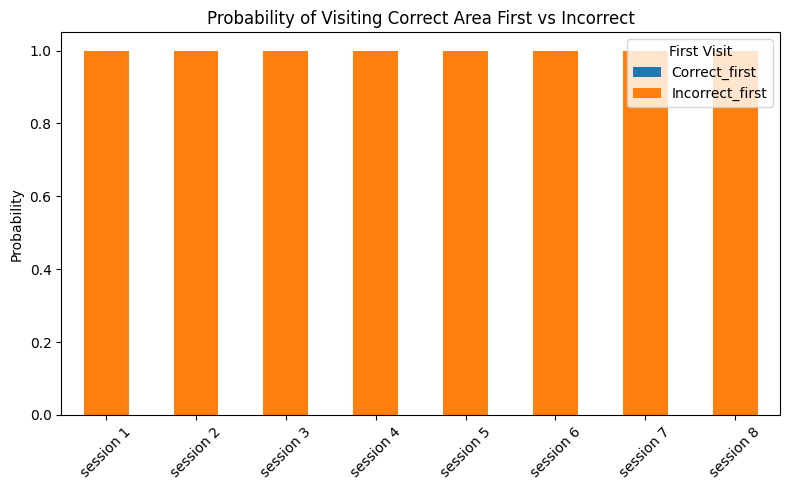

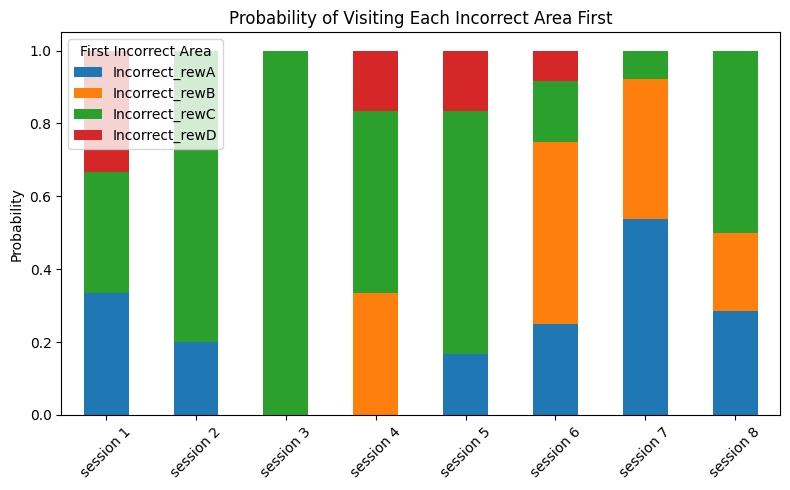

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop rows without data
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_first = (df['first_reward_area_visited'] == df['area_rewarded']).sum()

        # Incorrect first visits (split by which area)
        incorrect_counts = df.loc[df['first_reward_area_visited'] != df['area_rewarded'], 'first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": 1 - (correct_first / total_trials)
        }

        # Add per-area incorrect probabilities
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_probabilities(summary_df):
    # Plot correct vs incorrect stacked
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Correct Area First vs Incorrect")
    plt.legend(title="First Visit")
    plt.tight_layout()
    plt.show()

    # Plot breakdown of incorrect first visits by area
    incorrect_cols = [col for col in summary_df.columns if col.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Each Incorrect Area First")
    plt.legend(title="First Incorrect Area")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\session 3.1\session_data_2024-08-19_12_36_04.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2\session_data_2024-08-21_11_14_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3\session_data_2024-08-22_14_33_31.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4\session_data_2024-08-23_10_42_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5\session_data_2024-08-27_13_05_19.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6\session_data_2024-08-28_11_58_14.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-29_10_23_026357session3.7\session_data_2024-08-29_10_23_02.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-30_10_07_556357session3.8\session_data_2024-08-30_10_07_55.csv"
]

summary = calculate_first_visit_probabilities(filepaths)
# Rename index to session labels
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary[['Correct_first', 'Incorrect_first']].plot.bar(
    figsize=(10, 6),
    color=['mediumseagreen', 'tomato']
)

plt.title("Correct vs. Incorrect First Choices Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Choice Type")
plt.tight_layout()
plt.show()

summary[['Incorrect_rewA', 'Incorrect_rewB', 'Incorrect_rewC', 'Incorrect_rewD']].plot.bar(
    figsize=(12, 6),
    color=['slateblue', 'darkorange', 'teal', 'crimson']
)

plt.title("Incorrect Visits per Reward Zone Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Reward Zone")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_probabilities(summary)


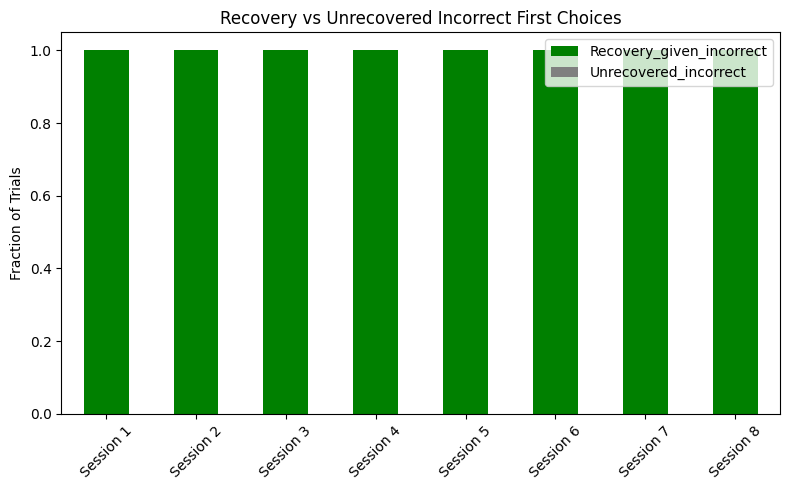

           Correct_first  Incorrect_first  Recovery_given_incorrect  \
Session 1            0.0              1.0                       1.0   
Session 2            0.0              1.0                       1.0   
Session 3            0.0              1.0                       1.0   
Session 4            0.0              1.0                       1.0   
Session 5            0.0              1.0                       1.0   
Session 6            0.0              1.0                       1.0   
Session 7            0.0              1.0                       1.0   
Session 8            0.0              1.0                       1.0   

           Mean_latency_correct  Mean_latency_incorrect   Latency_cost  \
Session 1                   0.0           519298.666667  519298.666667   
Session 2                   0.0           244739.000000  244739.000000   
Session 3                   0.0           139855.000000  139855.000000   
Session 4                   0.0           106548.166667  106548.

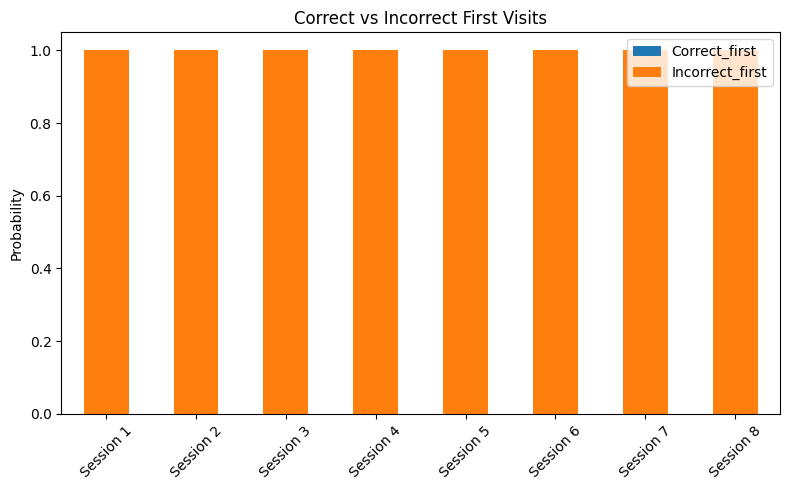

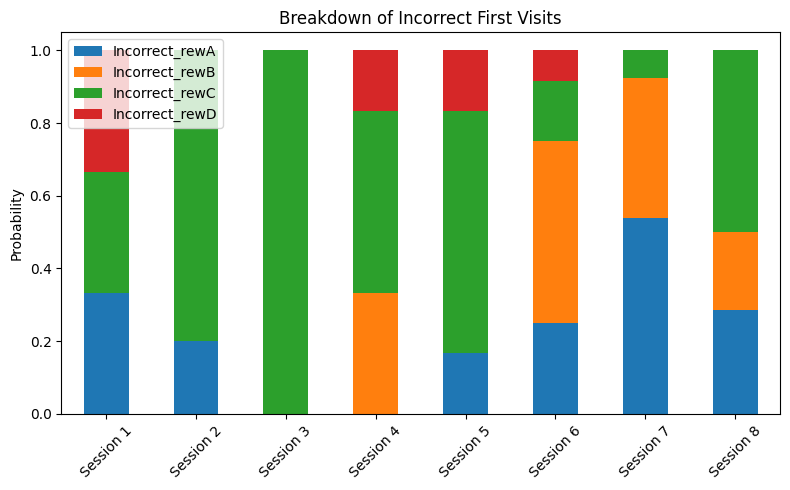

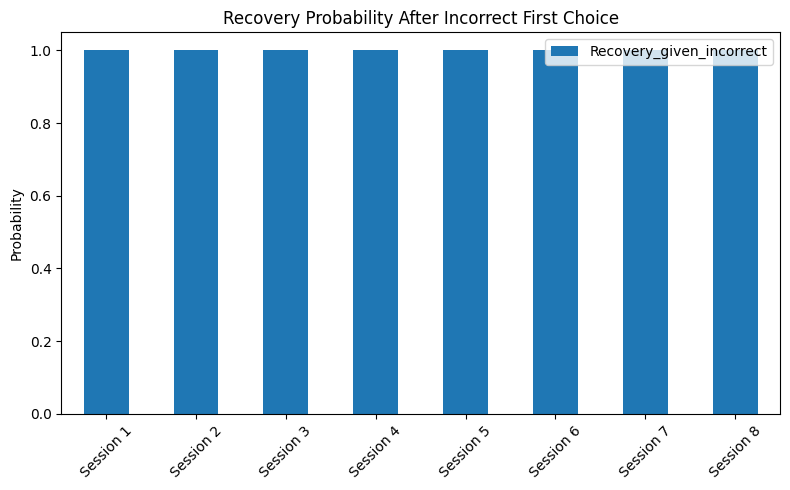

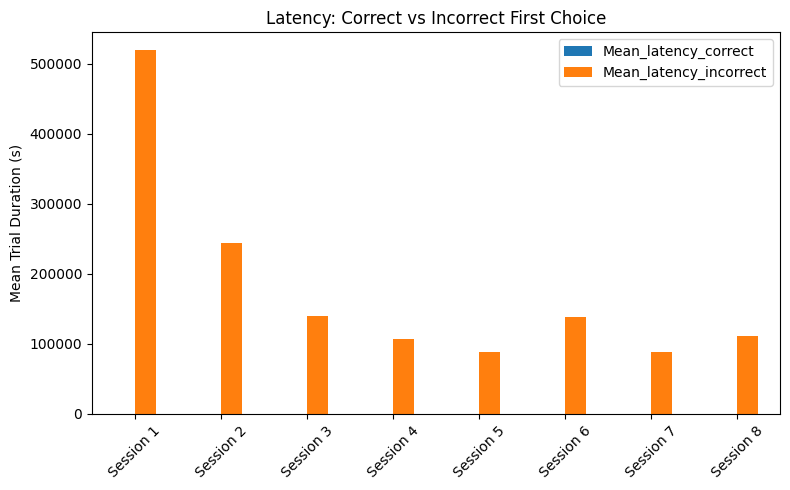

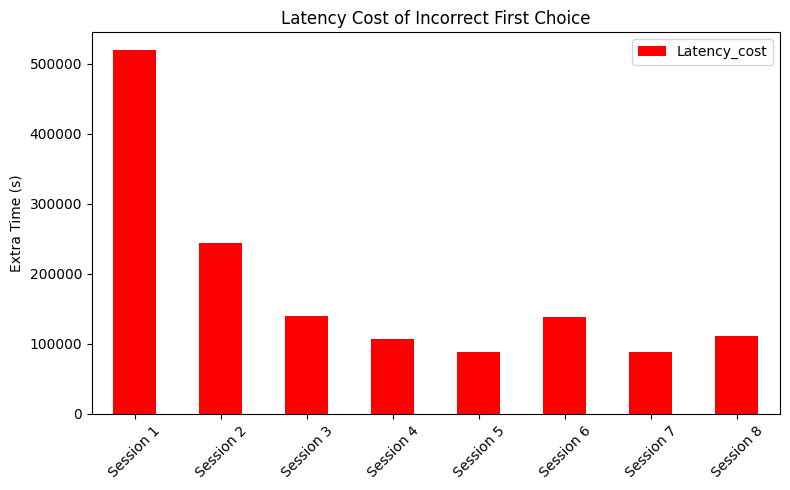

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_recovery_latency(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop missing rows
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        # Calculate trial duration
        df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
        incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

        correct_first = len(correct_df)
        incorrect_first = len(incorrect_df)

        # Recovery rate (hit correct eventually)
        recovery_trials = incorrect_df[(incorrect_df['hit'] == 1) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
        recovery_count = len(recovery_trials)

        # Mean latencies
        mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
        mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
        latency_cost = mean_incorrect_latency - mean_correct_latency

        # Incorrect breakdown
        incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": incorrect_first / total_trials,
            "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
            "Mean_latency_correct": mean_correct_latency,
            "Mean_latency_incorrect": mean_incorrect_latency,
            "Latency_cost": latency_cost
        }

        # Breakdown of incorrect first visits
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_recovery_latency(summary_df):
    # Correct vs incorrect first
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Correct vs Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Breakdown incorrect
    incorrect_cols = [c for c in summary_df.columns if c.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Breakdown of Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Recovery
    summary_df[['Recovery_given_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Recovery Probability After Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    # Latency cost
    summary_df[['Mean_latency_correct', 'Mean_latency_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Mean Trial Duration (s)")
    plt.title("Latency: Correct vs Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    summary_df[['Latency_cost']].plot(
        kind='bar', figsize=(8, 5), rot=45, color="red")
    plt.ylabel("Extra Time (s)")
    plt.title("Latency Cost of Incorrect First Choice")
    plt.tight_layout()
    plt.show()


# Example usage
filepaths = [
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\session 3.1\session_data_2024-08-19_12_36_04.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2\session_data_2024-08-21_11_14_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3\session_data_2024-08-22_14_33_31.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4\session_data_2024-08-23_10_42_22.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5\session_data_2024-08-27_13_05_19.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6\session_data_2024-08-28_11_58_14.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-29_10_23_026357session3.7\session_data_2024-08-29_10_23_02.csv",
    r"C:\Users\shahd\Box\Awake Project\Maze data\simplermaze\mouse 6357\2024-08-30_10_07_556357session3.8\session_data_2024-08-30_10_07_55.csv"
]

summary = calculate_first_visit_recovery_latency(filepaths)
summary.index = [f"Session {i+1}" for i in range(len(summary))]
summary['Unrecovered_incorrect'] = summary['Incorrect_first'] - (summary['Recovery_given_incorrect'] * summary['Incorrect_first'])

summary[['Recovery_given_incorrect', 'Unrecovered_incorrect']].plot(
    kind='bar', stacked=True, figsize=(8, 5), rot=45, color=['green', 'gray']
)
plt.ylabel("Fraction of Trials")
plt.title("Recovery vs Unrecovered Incorrect First Choices")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_recovery_latency(summary)
